# Predicción de tarifas de taxis

In [21]:
# Importando librerías

import pandas as pd
import numpy as np
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Ignoramos los futuros warnings
warnings.filterwarnings("ignore")

In [23]:
# Cargando datos

'''
    Aquí cada uno escribira su propia ruta para no subir el archivo dado que es demasiado pasado
'''

# Ruta de Danilo
#nombre_archivo ='../../PracticaCalificada2-CC421/train.csv'

# Ruta de Victor
nombre_archivo ='D:/Nueva carpeta (4)/UNI-21-I/IA/PracticaCalificada2-CC421/PracticaCalificada2-CC421/train.csv'

# Cargando los datos
# Estoy usando una menor cantidad de data ya que mi hardware no soporta los 55 millones de datos y demora mucho varias veces 
# Si se desea trabajar con toda la data completa borrar nrows = 1000000
df = pd.read_csv(nombre_archivo,nrows=100000)

## 1. Análisis de Datos

In [24]:
# Visualización de los 30 primeros datos
df.head(30)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [25]:
# Cantidad de instancias y atributos (filas x columndas)

print("Cantidad de Instancias: "+str(df.shape[0]))
print("Cantidad de Atributos: "+str(df.shape[1]))

Cantidad de Instancias: 100000
Cantidad de Atributos: 8


In [26]:
# Visualización de los tipos de datos del dataframe
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [27]:
# Descripción actual de algunas mediciones 
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [28]:
# Verificando la correlación de las caracteristicas

'''
    Nota: Necesitan ser trabajadas dando que hay mucha dependencia entre características y poca correlación
        con la característica a predecir.
'''

df.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.008975,-0.008952,0.006322,-0.005587,0.015804
pickup_longitude,0.008975,1.000000,-0.946674,0.937559,-0.911016,-0.001342
pickup_latitude,-0.008952,-0.946674,1.000000,-0.926534,0.930183,-0.000920
dropoff_longitude,0.006322,0.937559,-0.926534,1.000000,-0.963604,-0.000380
dropoff_latitude,-0.005587,-0.911016,0.930183,-0.963604,1.000000,-0.002173
passenger_count,0.015804,-0.001342,-0.000920,-0.000380,-0.002173,1.000000


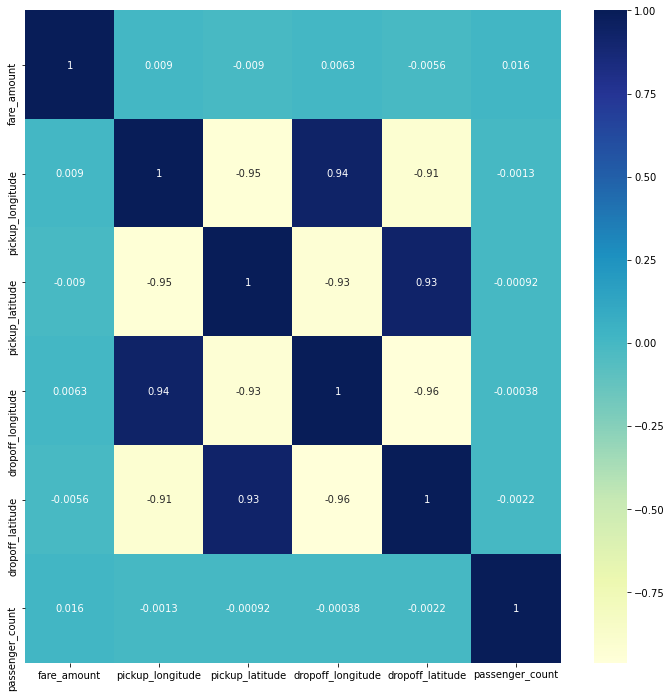

In [29]:
plt.figure(figsize=(12,12))

correlacion = df.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

In [30]:
# Verificando la cantidad de datos corrompidos o nulos

df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [31]:
df.sort_values('pickup_datetime')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
82469,2009-01-01 00:41:00.0000003,6.20,2009-01-01 00:41:00 UTC,-73.994202,40.751008,-73.985817,40.750577,2
76195,2009-01-01 01:21:54.0000002,4.90,2009-01-01 01:21:54 UTC,-73.951810,40.714897,-73.962162,40.709354,4
12739,2009-01-01 01:31:49.0000003,8.60,2009-01-01 01:31:49 UTC,-73.994192,40.720077,-73.993356,40.742642,1
17546,2009-01-01 02:05:37.0000004,11.00,2009-01-01 02:05:37 UTC,-73.978433,40.744781,-74.004713,40.734328,1
25687,2009-01-01 02:07:49.0000001,17.80,2009-01-01 02:07:49 UTC,-73.984291,40.667851,-74.006015,40.735481,3
...,...,...,...,...,...,...,...,...
83443,2015-06-30 21:54:22.0000004,18.00,2015-06-30 21:54:22 UTC,-73.993111,40.768154,-73.943871,40.837780,1
90057,2015-06-30 22:14:07.00000014,57.54,2015-06-30 22:14:07 UTC,-73.776703,40.645302,-73.994560,40.745377,5
75418,2015-06-30 22:27:27.0000003,20.50,2015-06-30 22:27:27 UTC,-73.885849,40.773113,-73.956100,40.717365,1
1428,2015-06-30 22:42:39.00000014,9.00,2015-06-30 22:42:39 UTC,-73.997223,40.726227,-73.978622,40.734432,1


## 2. Procesamiento de Datos

In [32]:
# Eliminamos 'key' ya que esta característica no aporta información relevante
df.drop(columns=['key'], inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
99995,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4


In [33]:
# Eliminaremos los datos nulos y duplicados dado que la cantidad de estos es insignificante para la población

df_new = df.drop_duplicates()
df_new.dropna(inplace=True)
df_new

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
99995,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4


In [34]:
'''
    Tareas:
    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver
    esto con gráficas de boxplot.
    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características
    que sirvan mejor para las predicciones.
    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y
    horas o como crean convenientes.
'''

'\n    Tareas:\n    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver\n    esto con gráficas de boxplot.\n    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características\n    que sirvan mejor para las predicciones.\n    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y\n    horas o como crean convenientes.\n'

## 3. Tratamiento de Datos

In [35]:
import datetime
##separamos los dias meses años y horas 
## Se cita https://stackoverflow.com/questions/53914889/extract-day-of-month-as-array-from-datetime-column

df_new['pickup_datetime'] = pd.to_datetime(df_new['pickup_datetime'], errors='coerce')
df_new['day']=df_new['pickup_datetime'].dt.day.values
df_new['month']=df_new['pickup_datetime'].dt.month.values
df_new['year']=df_new['pickup_datetime'].dt.year.values
df_new['hours']=df_new['pickup_datetime'].dt.hour.values

df_new


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7
...,...,...,...,...,...,...,...,...,...,...,...
99995,9.0,2013-09-24 07:39:00+00:00,-73.947977,40.784792,-73.964262,40.792347,5,24,9,2013,7
99996,6.0,2014-05-15 12:15:45+00:00,-73.962918,40.799107,-73.974178,40.786487,1,15,5,2014,12
99997,5.0,2015-02-19 17:40:43+00:00,-73.996773,40.723549,-73.991974,40.724724,1,19,2,2015,17
99998,6.9,2009-10-10 23:35:00+00:00,-73.983652,40.756667,-73.982715,40.767067,4,10,10,2009,23


In [36]:
## Con la data ya mas limpia mostramos un resumen de los datos
df_new.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820,15.664270,6.261230,2011.74389,13.495110
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171,8.677631,3.450569,1.86602,6.507434
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000,1.000000,1.000000,2009.00000,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000,8.000000,3.000000,2010.00000,9.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000,16.000000,6.000000,2012.00000,14.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000,23.000000,9.000000,2013.00000,19.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000,31.000000,12.000000,2015.00000,23.000000


In [37]:
## Se cita https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
## Hallamos una distancia para poder aprovecharr la latitud y longitud y trabajar con la distancia
from math import radians,cos,sin,asin

def distance(lonx,lony,latx,laty):
    lonx =radians(lonx)
    lony =radians(lony)
    latx =radians(latx)
    laty =radians(laty)

    d_lon=lony-lonx
    d_lat=laty-latx
    a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    c = 2 * asin(a**(1/2))
    distancia=round(6371*c,2)
    return(distancia)

dis=[]


for i in range(df_new.shape[0]):
    dis.append(distance(df_new["pickup_longitude"][i],
                        df_new["dropoff_longitude"][i],
                        df_new["pickup_latitude"][i],
                        df_new["dropoff_latitude"][i]))


df_new["distancia en km"] = dis
df_new.head(30)



,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia en km
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,6,1,2011,9,3.79
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,20,11,2012,20,1.56
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,4,1,2012,17,4.16
8,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,3,12,2012,13,1.25
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2,9,2009,1,2.85


In [38]:

##observamos que hay pasajeros =0 , no deberia ocurrir
df_new.groupby("passenger_count")["passenger_count"].count()


passenger_count
0      366
1    69619
2    14561
3     4289
4     2091
5     7034
6     2040
Name: passenger_count, dtype: int64

In [39]:

## limpiamos la data , especificamente cuendo hay pasajeros = 0

df_new2=df_new[(df_new["passenger_count"]> 0) & (df_new["passenger_count"] <=6)]
df_new2=df_new[(df_new["fare_amount"]> 2.0) ]
df_new2 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia en km
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9.0,2013-09-24 07:39:00+00:00,-73.947977,40.784792,-73.964262,40.792347,5,24,9,2013,7,1.61
99996,6.0,2014-05-15 12:15:45+00:00,-73.962918,40.799107,-73.974178,40.786487,1,15,5,2014,12,1.69
99997,5.0,2015-02-19 17:40:43+00:00,-73.996773,40.723549,-73.991974,40.724724,1,19,2,2015,17,0.42
99998,6.9,2009-10-10 23:35:00+00:00,-73.983652,40.756667,-73.982715,40.767067,4,10,10,2009,23,1.16


In [40]:
df_new2.groupby("fare_amount")["fare_amount"].count() 

fare_amount
2.50      412
2.51        2
2.90      233
3.00      186
3.30      799
         ... 
160.00      2
160.77      1
165.00      2
180.00      1
200.00      1
Name: fare_amount, Length: 922, dtype: int64

<AxesSubplot:ylabel='fare_amount'>

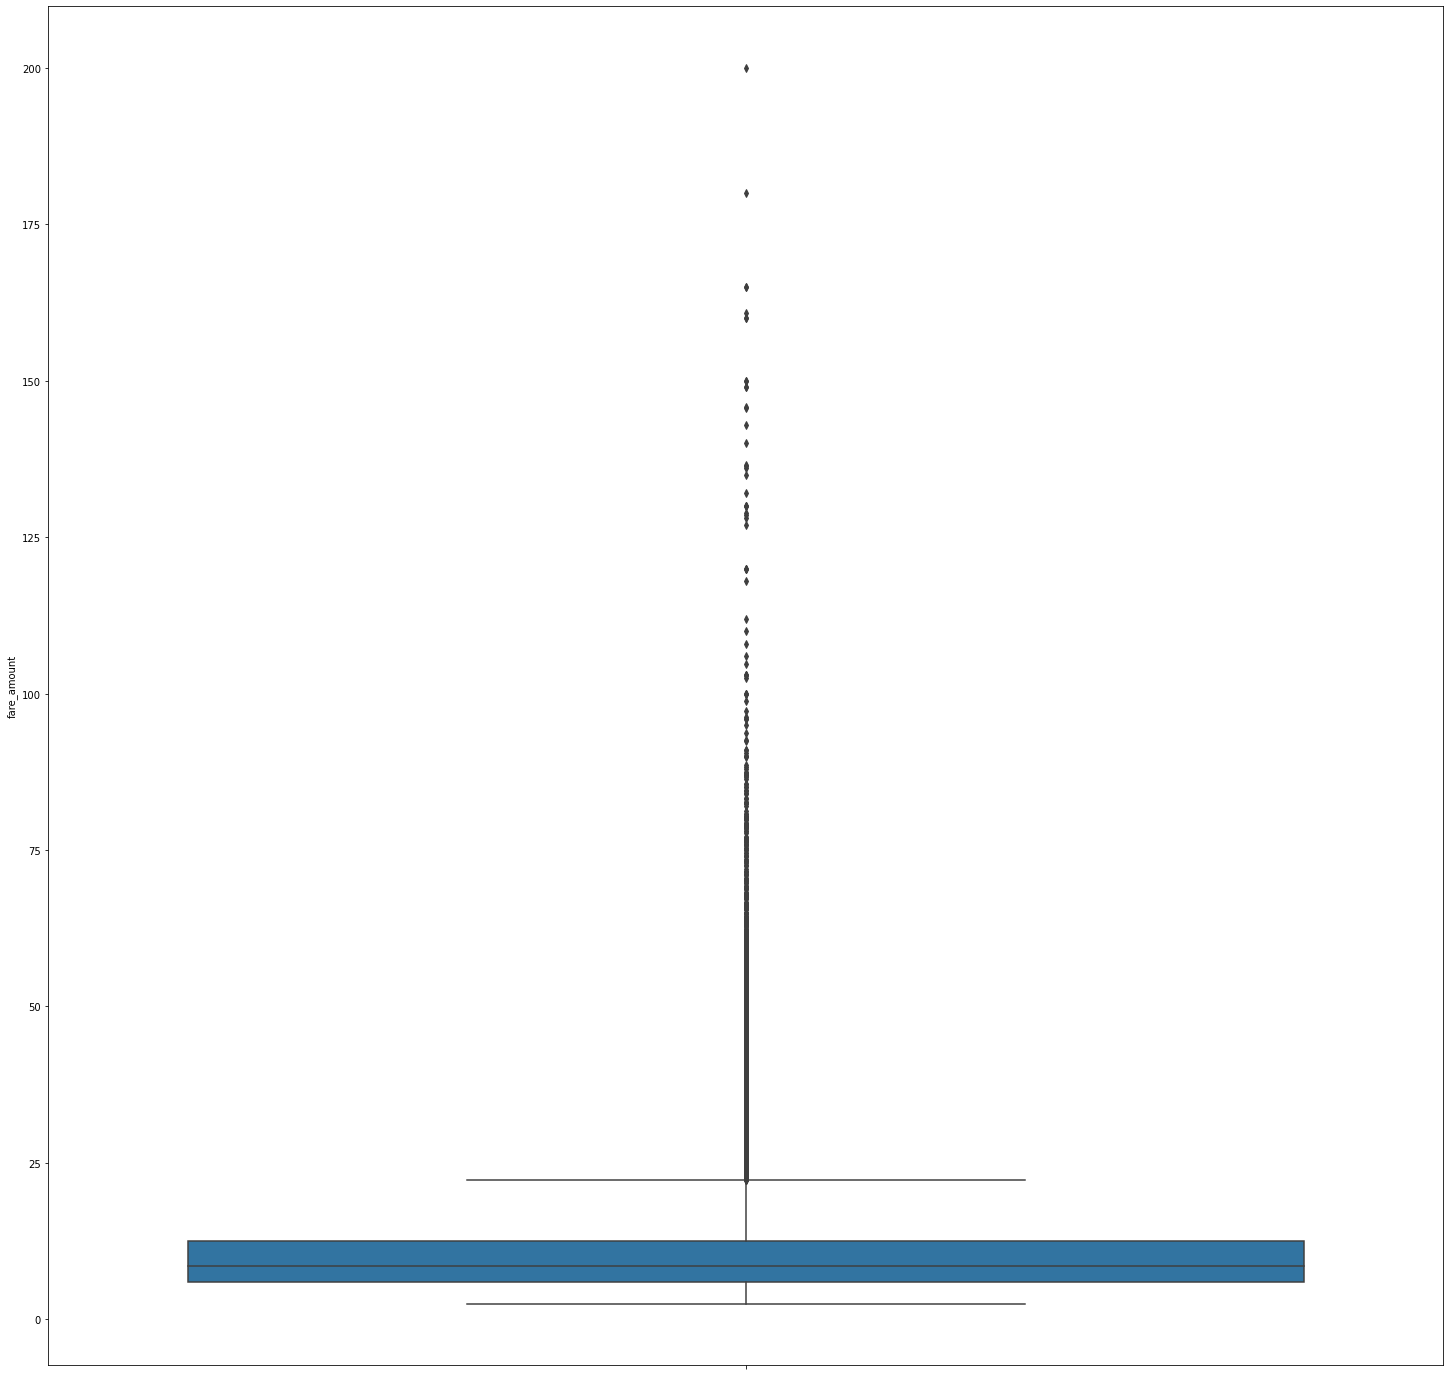

In [41]:

plt.figure(figsize=(25,25))
sns.boxplot(y='fare_amount',data=df_new2)

## 4. Modelamiento

## 5. Optimización y forecasting